----

#### Leitura e visualização de dados:

##### Importando Bibliotecas de leitura e visualização:

In [ ]:
import pandas as pd
import seaborn as sns

#Ignorar Warnings nas saídas:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

##### Lendo o dataframe

In [2]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Verificando informações do Dataset

In [6]:
print(f"Temos {len(df.columns)} colunas nesse conjunto de dados. São elas:")
df.info()

Temos 12 colunas nesse conjunto de dados. São elas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


----

- **id:** identificador único
- **gender:** "Masculino", "Feminino" ou "Outro"
- **age:** idade do paciente
- **hypertension:** 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
- **heart_disease:** 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca
- **ever_married:** "Não" ou "Sim"
- **work_type:** "crianças", "Governo", "Nunca trabalhou", "Privado" ou "Autônomo"
- **Residence_type:** "Rural" ou "Urbano"
- **avg_glucose_level:** nível médio de glicose no sangue
- **bmi:** índice de massa corporal (IMC)
- **smoking_status:** status de tabagismo -> "fumante anterior", "nunca fumou", "fuma" ou "Desconhecido"*
- **stroke:** 1 se o paciente teve um derrame ou 0 se não    
**Nota: "Desconhecido" em status de tabagismo significa que a informação não está disponível para este paciente*

##### Verificando o balanceamento do Dataset:

In [3]:
balance = df['stroke'].value_counts(normalize=True)
print(f'#  Balanceamento\n1: {round(balance[1]* 100, 2)}%\n0: {round(balance[0] * 100, 2)}%')

#  Balanceamento
1: 4.87%
0: 95.13%


#### Verificação de valores nulos

In [21]:
df_cleaned.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Visualizando a distribuição dos dados em relação ao target (output)

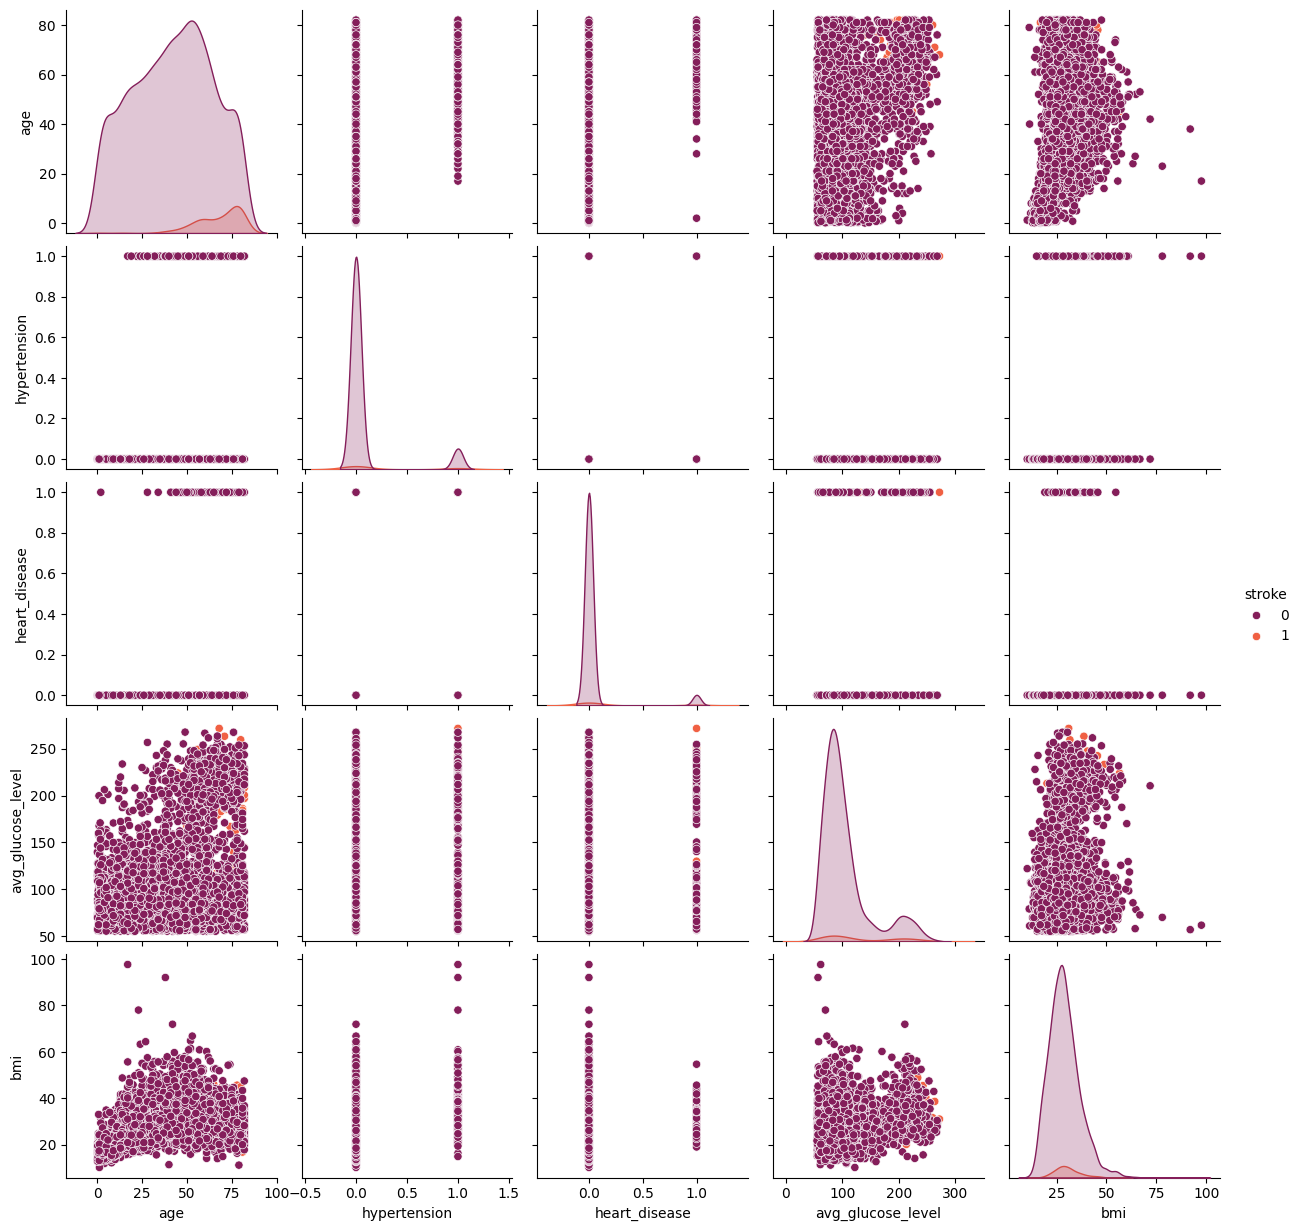

In [29]:
sns.pairplot(df_cleaned, hue='stroke', palette='rocket')

In [33]:
df_cleaned[['bmi', 'heart_disease','hypertension', 'stroke']][df_cleaned['bmi'].notna()].corr().style.background_gradient()

,bmi,heart_disease,hypertension,stroke
bmi,1.000000,0.041322,0.167770,0.042341
heart_disease,0.041322,1.000000,0.115978,0.137929
hypertension,0.167770,0.115978,1.000000,0.142503
stroke,0.042341,0.137929,0.142503,1.000000


In [34]:
df_cleaned[['heart_disease','hypertension', 'stroke']].corr().style.background_gradient()

,heart_disease,hypertension,stroke
heart_disease,1.000000,0.108292,0.134905
hypertension,0.108292,1.000000,0.127891
stroke,0.134905,0.127891,1.000000


####
----
####

#### Tratamento de dados:

##### Importando bibliotecas necessárias:

In [39]:
from sklearn.model_selection import train_test_split

##### Tratando dados:

In [ ]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
df_cleaned = df[df['gender'] != 'Other']
df_cleaned['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [26]:
df_cleaned.drop(columns=['id'], inplace=True)
df_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
print("media")
print(df['bmi'][df['stroke']==1].median())
print("mediana")
print(df['bmi'].median())

media
28.893236911794666
mediana
28.1


In [28]:
print("stroke=1")
print(df['bmi'][df['stroke']==1].median())
print("stroke=0")
print(df['bmi'][df['stroke']==0].median())

stroke=1
29.7
stroke=0
28.0


##### Realizando o Split:

####
----
####

#### Preparando a predição:

##### Importando as bibliotecas necessárias

In [38]:
#Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Kfold
from sklearn.model_selection import KFold, StratifiedKFold

#Grid
from sklearn.model_selection import GridSearchCV

#Scorers
from sklearn.metrics import recall_score, f1_score, precision_score, make_scorer

#Estimador:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression

##### Definindo o Scaler:

##### Organizando o Pipeline:

##### Organizando o Grid:

####
----
####

#### Visualização de resultados:

##### Importando bibliotecas necessárias:

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##### Visualizando resultados:

####
----
####

#### Conclusões:

####
----
####